In [1]:
from sklearn import datasets
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

In [2]:
oliv = datasets.fetch_olivetti_faces()

In [3]:
oliv

{'data': array([[0.30991736, 0.3677686 , 0.41735536, ..., 0.15289256, 0.16115703,
         0.1570248 ],
        [0.45454547, 0.47107437, 0.5123967 , ..., 0.15289256, 0.15289256,
         0.15289256],
        [0.3181818 , 0.40082645, 0.49173555, ..., 0.14049587, 0.14876033,
         0.15289256],
        ...,
        [0.5       , 0.53305787, 0.607438  , ..., 0.17768595, 0.14876033,
         0.19008264],
        [0.21487603, 0.21900827, 0.21900827, ..., 0.57438016, 0.59090906,
         0.60330576],
        [0.5165289 , 0.46280992, 0.28099173, ..., 0.35950413, 0.3553719 ,
         0.38429752]], dtype=float32),
 'images': array([[[0.30991736, 0.3677686 , 0.41735536, ..., 0.37190083,
          0.3305785 , 0.30578512],
         [0.3429752 , 0.40495867, 0.43801653, ..., 0.37190083,
          0.338843  , 0.3140496 ],
         [0.3429752 , 0.41735536, 0.45041323, ..., 0.38016528,
          0.338843  , 0.29752067],
         ...,
         [0.21487603, 0.20661157, 0.2231405 , ..., 0.15289256,
     

In [5]:
oliv.keys() # DECR is description and there are 40 targets 

dict_keys(['data', 'images', 'target', 'DESCR'])

In [6]:
oliv['data'].shape #this makes a 64*64 2D image into a single 4096 1D array , there are 400 such images

(400, 4096)

In [7]:
oliv['images'].shape

(400, 64, 64)

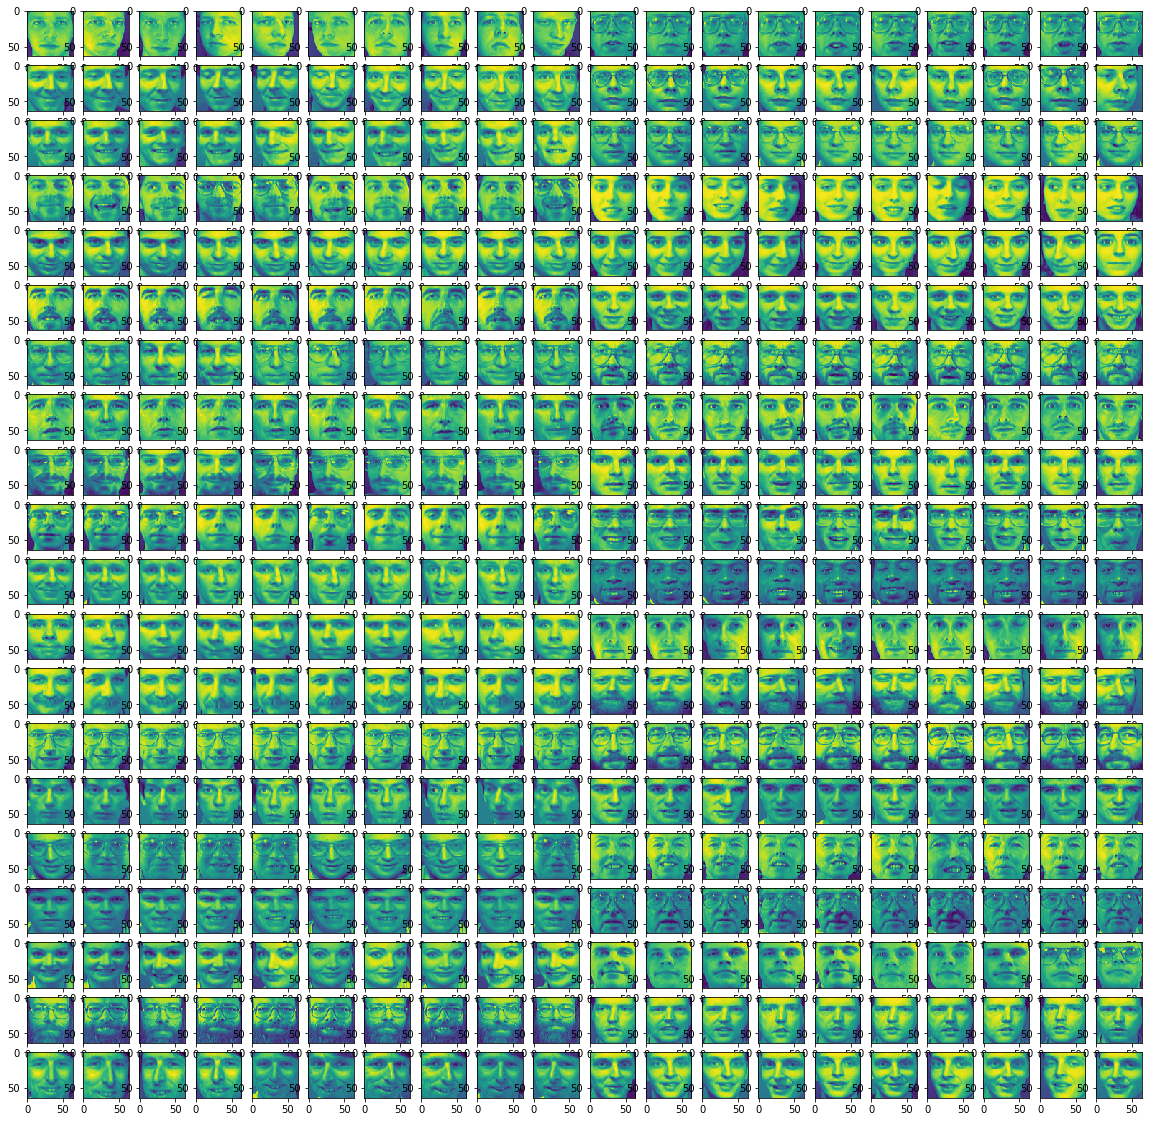

In [9]:
#lets plot these images
fig = plt.figure(figsize=(20,20)) #DOES NOT MEAN NO OF COLUMNS OR ROWS , JUST SIZE or Area
for i in range(400):
    #plotting 400 images
    ax = fig.add_subplot(20,20,i+1)
    ax.imshow(oliv.images[i])
plt.show()
#40 people with each having 10 images

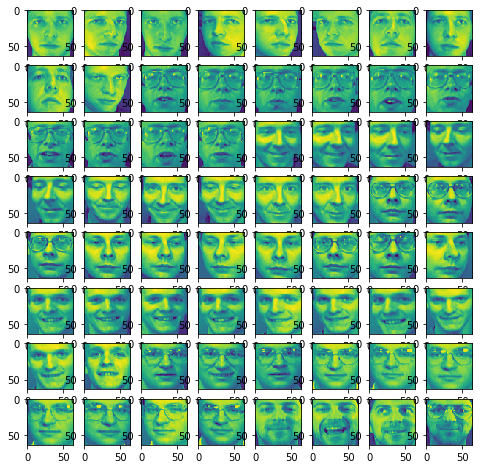

In [10]:
#We wil work on only the first 64 images
fig = plt.figure(figsize=(8,8)) #DOES NOT MEAN NO OF COLUMNS OR ROWS , JUST SIZE or Area
for i in range(64):
    #plotting 64 images
    ax = fig.add_subplot(8,8,i+1)
    ax.imshow(oliv.images[i])
plt.show()

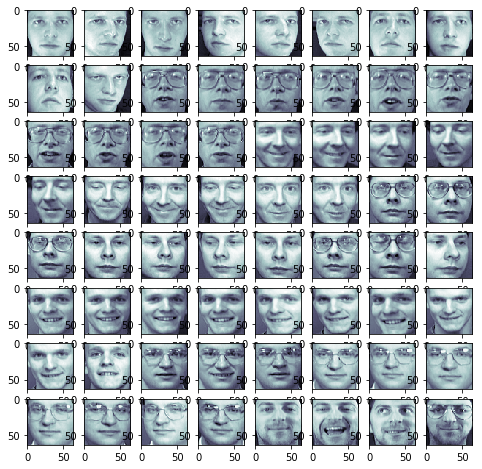

In [11]:
#since the images are very greenish , we use a different colormap
fig = plt.figure(figsize=(8,8)) #DOES NOT MEAN NO OF COLUMNS OR ROWS , JUST SIZE or Area
for i in range(64):
    #plotting 64 images
    ax = fig.add_subplot(8,8,i+1)
    ax.imshow(oliv.images[i], cmap = plt.cm.bone)
plt.show()

In [12]:
#for plotting , we used oliv.images , for PCA we need array so we use oliv.data
x = oliv.data
y = oliv.target

In [13]:
algo = PCA() #if n_components not mentioned then min of no of rows and no of columns is taken as number of 
#no of rows in the components
algo.fit(x)

PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [16]:
algo.components_.shape #there are 4096 columns so since n_components was not specified hence it is 4096
#but the number of rows is 400 , that is min(400,4096)
#usually it should have been 4096 * 4096 since each of the new 4096 described in the old 4096 features
#but now we have only 400 new components

(400, 4096)

In [17]:
algo.explained_variance_.shape

(400,)

In [18]:
#Now selecting how many we need
k = 0
total = 0
while total/sum(algo.explained_variance_) < 0.99:
    total += algo.explained_variance_[k]
    k+=1
print(k)

260


In [19]:
#Now selecting how many we need
k = 0
total = 0
while total/sum(algo.explained_variance_) < 0.95:
    total += algo.explained_variance_[k]
    k+=1
print(k)

123


In [21]:
algo2 = PCA(n_components=123, whiten=True) #for images usually use whiten = True for feature scaling after PCA
trans_data = algo2.fit_transform(x)
trans_data.shape

(400, 123)

In [24]:
#lets get the images back
x_approx = algo2.inverse_transform(trans_data)
print(x_approx.shape)

(400, 4096)


In [27]:
#Now we will plot the images back from this approx data
trans_images = x_approx.reshape((400,64,64))
trans_images.shape

(400, 64, 64)

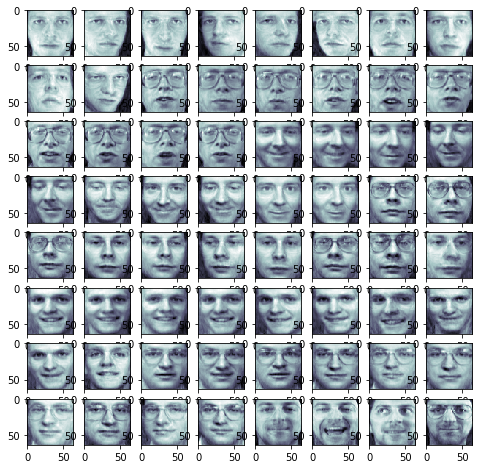

In [28]:
fig = plt.figure(figsize=(8,8)) #DOES NOT MEAN NO OF COLUMNS OR ROWS , JUST SIZE or Area
for i in range(64):
    #plotting 64 images
    ax = fig.add_subplot(8,8,i+1)
    ax.imshow(trans_images[i], cmap = plt.cm.bone)
plt.show()
#Even after changing number of features from 4096 to 123 , we have so much similarity and no obvious loss

In [30]:
#Now trying to understand the eigen vectors with 4096 columns and plotting it 
#concept of EignFaces
eigenv = algo2.components_
eigenv.shape

(123, 4096)

In [31]:
eigenfaces = eigenv.reshape((123,64,64))

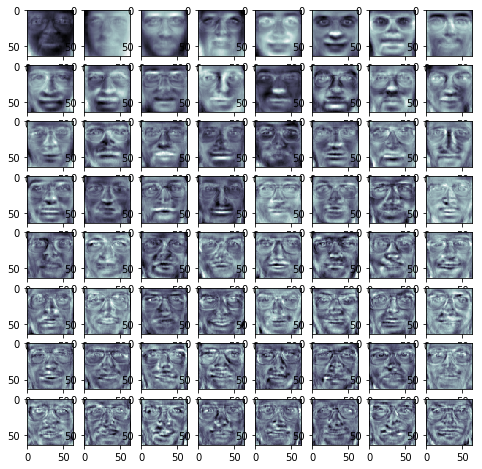

In [32]:
fig = plt.figure(figsize=(8,8)) #DOES NOT MEAN NO OF COLUMNS OR ROWS , JUST SIZE or Area
for i in range(64):
    #plotting 64 images
    ax = fig.add_subplot(8,8,i+1)
    ax.imshow(eigenfaces[i], cmap = plt.cm.bone)
plt.show()

In [34]:
"""Each eigen vector seems to be focusing on a particular aspect of a face like eyes , face , nose etc"""
"""Earlier the 4096 features were the pixel value at that address , so now we have more meaningful features"""

'Earlier the 4096 features were the pixel value at that address , so now we have more meaningful features'